In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
sns.set(color_codes=True)
%matplotlib inline
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv') 

In [214]:
df = pd.DataFrame(data)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The Customers have been given an ID from 1 to 5000


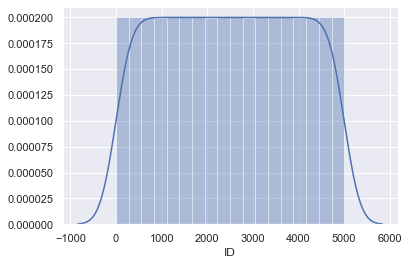

In [215]:
sns.distplot(df['ID'])
print('The Customers have been given an ID from 1 to 5000')

The Customer ages are above 20 and below 70


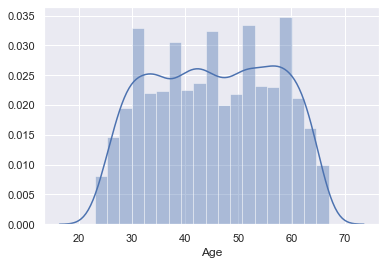

In [267]:
sns.distplot(df['Age'])
print('The Customer ages are above 20 and below 70')

The distribution of the Work Expreiences in years is shown below


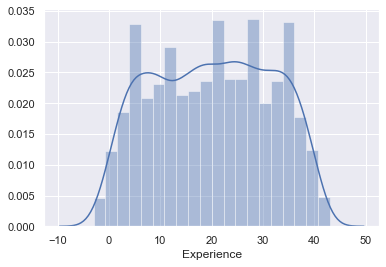

In [266]:
sns.distplot(df['Experience'])
print('The distribution of the Work Expreiences in years is shown below')

The distribution of the Customer Incomes is shown below, skewed to the left


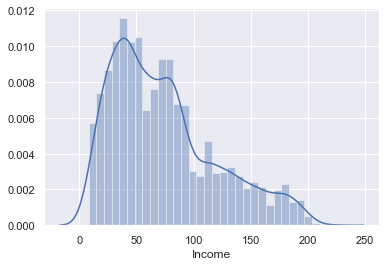

In [265]:
sns.distplot(df['Income'])
print('The distribution of the Customer Incomes is shown below, skewed to the left')

The distribution of the ZIP Code is shown below, all withon the 9000s


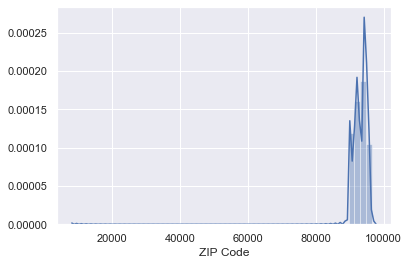

In [219]:
sns.distplot(df['ZIP Code'])
print('The distribution of the ZIP Code is shown below, all withon the 9000s')

The distribution of the Customer Family Sizes is shown below


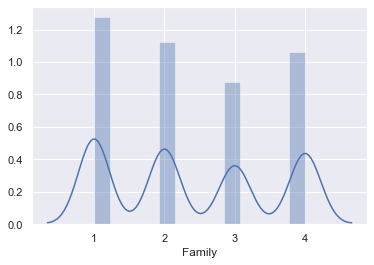

In [220]:
sns.distplot(df['Family'])
print('The distribution of the Customer Family Sizes is shown below')

The distribution of the Average Credit Card Spending per month is shown below, left skewed


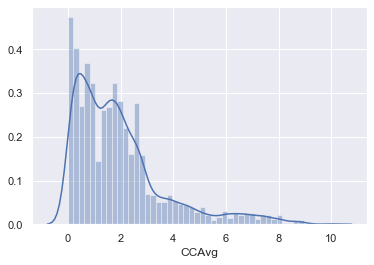

In [264]:
sns.distplot(df['CCAvg'])
print('The distribution of the Average Credit Card Spending per month is shown below, left skewed')

The distribution of the Education Levels is shown below, with 1 for Undergrads, 2 for Graduates and 3 for Professionals. Most are Undergrads


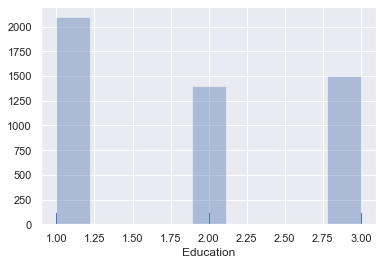

In [263]:
sns.distplot(df['Education'],kde=False,rug=True)
print('The distribution of the Education Levels is shown below, with 1 for Undergrads, 2 for Graduates and 3 for Professionals. Most are Undergrads')

Most people do not have any mortgages, while the amount of people with them are progressively smaller as the price increases


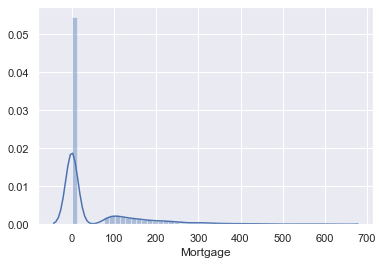

In [223]:
sns.distplot(df['Mortgage'])
print('Most people do not have any mortgages, while the amount of people with them are progressively smaller as the price increases')

A very small minority of customers have bought personal loans


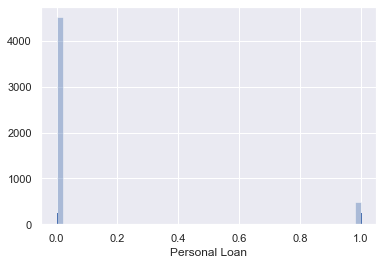

In [224]:
sns.distplot(df['Personal Loan'],kde=False,rug=True)
print('A very small minority of customers have bought personal loans')

A very small minority of customers have a securities account with the bank


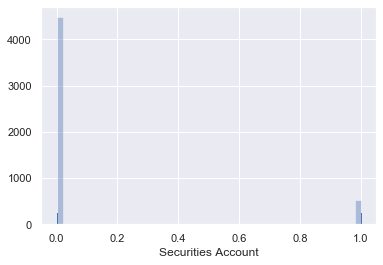

In [225]:
sns.distplot(df['Securities Account'],kde=False,rug=True)
print('A very small minority of customers have a securities account with the bank')

A very small minority of customers have a CD account with the bank


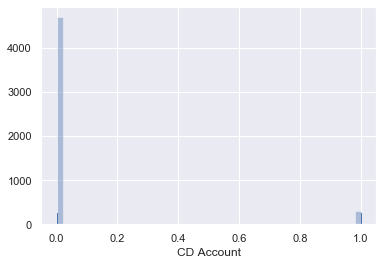

In [226]:
sns.distplot(df['CD Account'],kde=False,rug=True)
print('A very small minority of customers have a CD account with the bank')

Most of the customers(represented as 1 on the x axis) use internet banking facilities as shown below


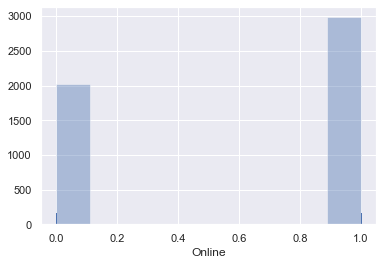

In [227]:
sns.distplot(df['Online'],kde=False,rug=True)
print('Most of the customers(represented as 1 on the x axis) use internet banking facilities as shown below')

Most of the customers(represented as 0 on the x axis) do not use a credit card issued by universal bank


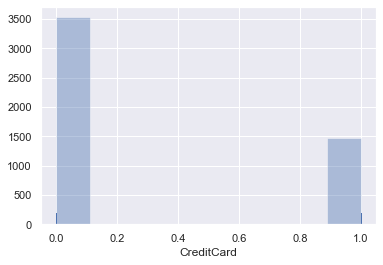

In [228]:
sns.distplot(df['CreditCard'],kde=False,rug=True)
print('Most of the customers(represented as 0 on the x axis) do not use a credit card issued by universal bank')

Personal loan has been chosen as the target column since all of the data has been collected to find which people will buy the personal loan


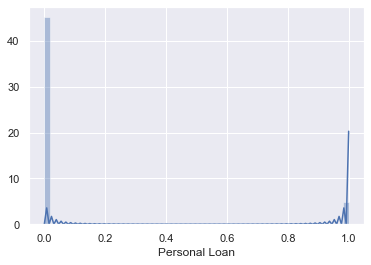

In [229]:
sns.distplot(df['Personal Loan'])
print('Personal loan has been chosen as the target column since all of the data has been collected to find which people will buy the personal loan')

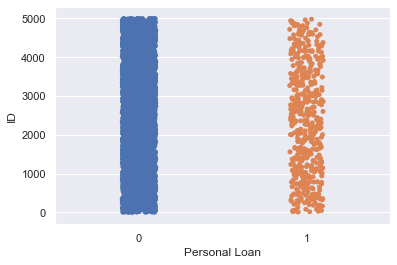

In [230]:
sns.stripplot(df['Personal Loan'],df['ID'],jitter=True)

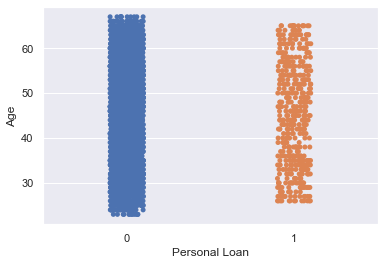

In [231]:
sns.stripplot(df['Personal Loan'],df['Age'],jitter=True)

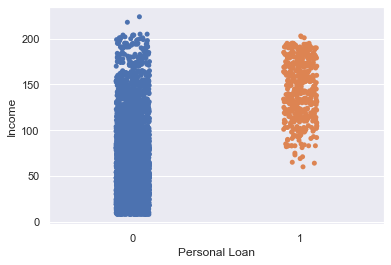

In [232]:
sns.stripplot(df['Personal Loan'],df['Income'],jitter=True)

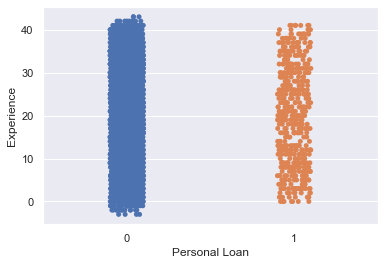

In [233]:
sns.stripplot(df['Personal Loan'],df['Experience'],jitter=True)

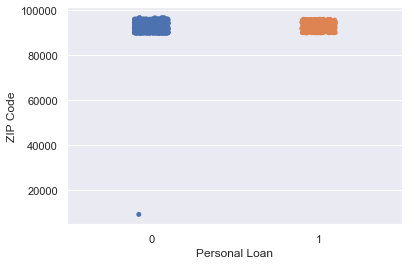

In [234]:
sns.stripplot(df['Personal Loan'],df['ZIP Code'],jitter=True)

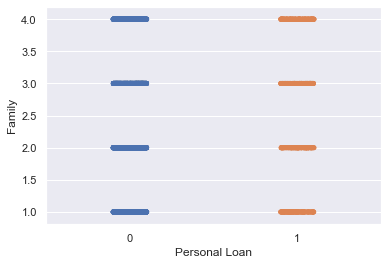

In [235]:
sns.stripplot(df['Personal Loan'],df['Family'],jitter=True)

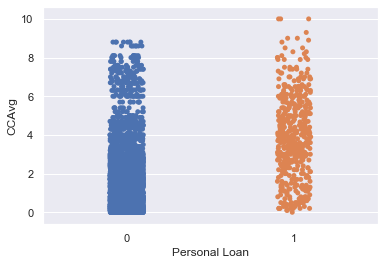

In [236]:
sns.stripplot(df['Personal Loan'],df['CCAvg'],jitter=True)

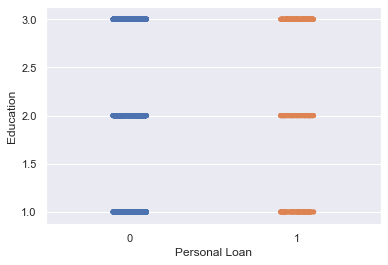

In [237]:
sns.stripplot(df['Personal Loan'],df['Education'],jitter=True)

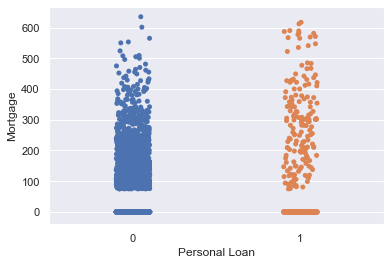

In [238]:
sns.stripplot(df['Personal Loan'],df['Mortgage'],jitter=True)

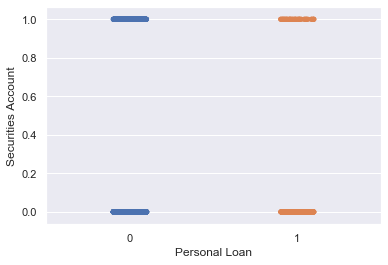

In [239]:
sns.stripplot(df['Personal Loan'],df['Securities Account'],jitter=True)

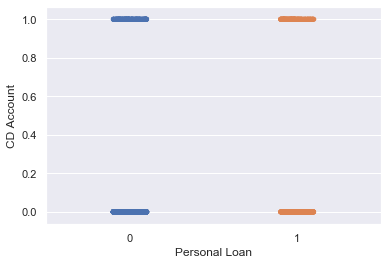

In [240]:
sns.stripplot(df['Personal Loan'],df['CD Account'],jitter=True)

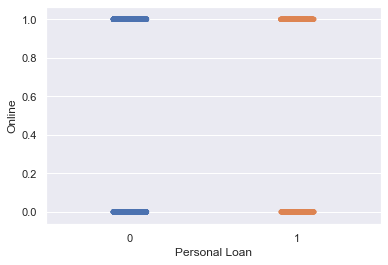

In [241]:
sns.stripplot(df['Personal Loan'],df['Online'],jitter=True)

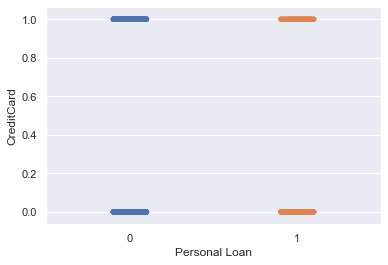

In [242]:
sns.stripplot(df['Personal Loan'],df['CreditCard'])

In [243]:
X = data.drop('Personal Loan',axis=1) 
Y = data['Personal Loan']   
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print('The data has now been split into training and testing sets in the ratio of 70:30')

The data has now been split into training and testing sets in the ratio of 70:30


In [2]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [245]:
model_score = model.score(x_test, y_test)
print("Model Performance:",model_score)

Model Performance: 0.908


Logistic Regression


(2.0, 0.0)

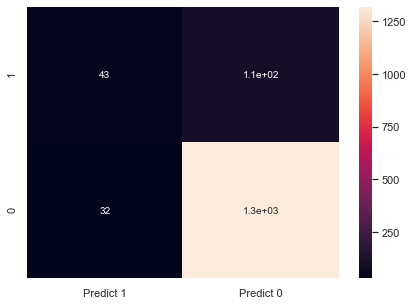

In [246]:
print("Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [247]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, y_predict) ) 

Total Accuracy :  0.908


In [248]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [249]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)
print("KNN makes no assumptions about distributions of classes in feature space, easy to implement and understand and is not impacted by outliers")

KNN makes no assumptions about distributions of classes in feature space, easy to implement and understand and is not impacted by outliers


KNN


(2.0, 0.0)

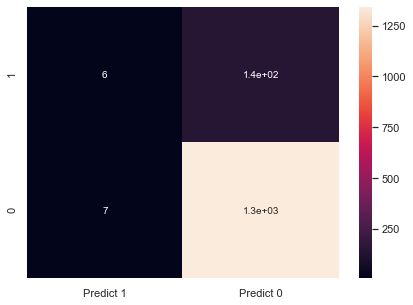

In [250]:
print("KNN")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [251]:
print( 'Total Accuracy : ',metrics.accuracy_score( y_test, predicted_labels))

Total Accuracy :  0.9


In [252]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1351
           1       0.46      0.04      0.07       149

    accuracy                           0.90      1500
   macro avg       0.68      0.52      0.51      1500
weighted avg       0.86      0.90      0.86      1500



In [253]:
diab_model = GaussianNB()
diab_model.fit(x_train, y_train.ravel())
print("Naive Bayes is simple, fast in processing and effective, requires few examples for training and easily obtains estimated probability for a prediction")

Naive Bayes is simple, fast in processing and effective, requires few examples for training and easily obtains estimated probability for a prediction


In [254]:
diab_train_predict = diab_model.predict(x_train)
print("Training model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))

Training model Accuracy: 0.8949


In [255]:
diab_test_predict = diab_model.predict(x_test)
print("Testing model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))

Testing model Accuracy: 0.8827


Naive Bayes


(2.0, 0.0)

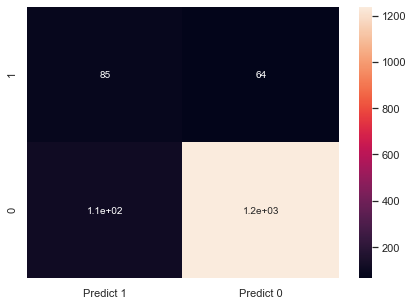

In [256]:
print("Naive Bayes")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [257]:
print( 'Total Accuracy : ', metrics.accuracy_score( y_test, diab_test_predict))

Total Accuracy :  0.8826666666666667


In [258]:
print(classification_report(y_test, diab_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.57      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [259]:
print("The Naive Bayes algorithm has the most true positives, but it also has the least true negatives, most overall false predictions and is the lowest performing and least accurate model.")

The Naive Bayes algorithm has the most true positives, but it also has the least true negatives, most overall false predictions and is the lowest performing and least accurate model.


In [260]:
print("The KNN algorithm has the least true positives and the most false positives, but it also has less false negatives.")

The KNN algorithm has the least true positives and the most false positives, but it also has less false negatives.


In [261]:
print("The Logistic Regression algorithm is tied with the KNN for most true negatives, between the other models in other categories, and slightly higher in accuracy than KNN.")

The Logistic Regression algorithm is tied with the KNN for most true negatives, between the other models in other categories, and slightly higher in accuracy than KNN.


In [262]:
print('Overall Logistic Regression seems to be the most reliable model, as it has higher true positive rate than knn, performance and accuracy than both the other models')

Overall Logistic Regression seems to be the most reliable model, as it has higher true positive rate than knn, performance and accuracy than both the other models
